In [ ]:
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms
import helper
import numpy as np
import os
import cv2
from google.colab.patches import cv2_imshow
from detectron2 import model_zoo
from detectron2.config import get_cfg
from detectron2.checkpoint import DetectionCheckpointer
from detectron2.modeling import build_model
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.data.datasets import register_coco_instances

In [ ]:
# Hi Davide, please add the root-directory here such that
#    root --- datasets
#          |
#          -- notebooks
#          | 
#          -- models

# this notebook should be in the notebooks dir

root = ''
ds_path = os.path.join(root, 'datasets/duke_train/data/')
json_path = os.path.join(root, 'datasets/duke_train/labels.json')
ds_name = 'duke'

if ds_name in DatasetCatalog.list():
    DatasetCatalog.remove(ds_name)
    MetadataCatalog.remove(ds_name)

register_coco_instances(ds_name, {}, json_path, ds_path)

In [ ]:
# retina_net = 'retinanet_R_101_FPN_3x.yaml'
frcnn = 'faster_rcnn_R_101_FPN_3x.yaml'

current = frcnn 

cfg = get_cfg() # Model Config
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/"+current))
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2   # for R-CNN Models
# cfg.MODEL.RETINANET.NUM_CLASSES = 2   # for RetinaNet  
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.1  # for R-CNN Models
# cfg.MODEL.RETINANET.SCORE_THRESH_TEST = 0.1  # for Retinanet

model_name = '2021-11-29_frcnn_180000_dukeset/model_final.pth'
model_path = os.path.join(root, 'models/'+model_name)

cfg.MODEL.WEIGHTS = model_path

Loading config /usr/local/lib/python3.7/dist-packages/detectron2/model_zoo/configs/COCO-Detection/../Base-RetinaNet.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.


In [ ]:
predictor = DefaultPredictor(cfg)

In [ ]:
# IMPORTANT: DECIDES IF IMAGES ANALYSED ARE FROM THE DUKE OR MAXAR DATASET 
# ALSO: the cfg.MODEL.RETINANET.SCORE_THRESH_TEST has to be much lower for maxar (recommend 0.1)
# for duke images, I recommend 0.5

# (results are better for duke, but we get some really cool detections for maxar) 
IMG_SOURCE = 'maxar'

data_dir = os.path.join(root, 'datasets/'+IMG_SOURCE+'_train/')
images = os.listdir(data_dir+'data/')
images = [data_dir+'data/'+img for img in images if img.endswith('.png')]

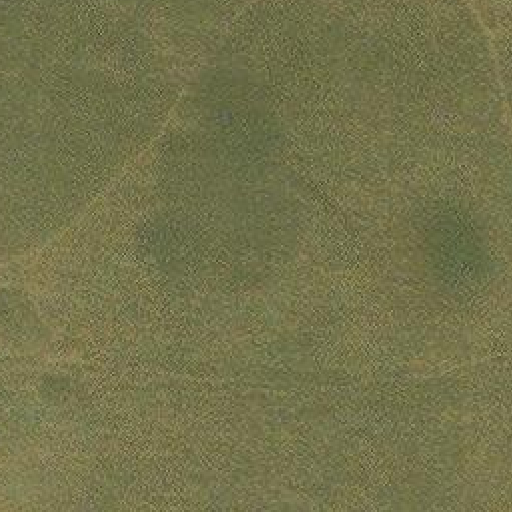

In [ ]:
img = cv2.imread(images[np.random.randint(0, len(images)-1)])
out = predictor(img)
v = Visualizer(img[:, :, ::-1], MetadataCatalog.get('duke'), scale=2)
out = v.draw_instance_predictions(out["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])